<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_2244/NGC_2244_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [ ]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install astroquery

In [ ]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


#### Finding GAIA Data

In [85]:
## making a GAIA cone_search of 30m radius around NGC2244 center

coordinate = coord.SkyCoord.from_name('NGC2244')
print(coordinate)
radius = u.Quantity(1.4, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (97.97916667, 4.94166667)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [86]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 3131335693444052352,3131335693444052352,659493987,2015.5,97.978172,9.967009,4.940506,5.454954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,0,38,0,11.488217,239.458542,6.685602,14.628173,3,False,0.013427,NaN,NaN,-0.308688,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.306445,-2.073384,98.373117,-18.267182,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001526
1,1635721458409799680,Gaia DR2 3131335693440838400,3131335693440838400,216149652,2015.5,97.980384,0.062809,4.943135,0.080662,0.161289,0.123253,1.308609,-1.794845,0.125596,0.242008,0.103372,-0.438540,0.493487,0.246715,0.312420,-0.758702,-0.449349,-0.466748,0.669478,0.462585,0.118844,123,123,117,6,10.460493,351.405518,0.000000,1.940850,31,False,377.260559,1.756390,0.017545,-0.205275,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.305128,-2.070216,98.375273,-18.264429,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001905
2,1635721458409799680,Gaia DR2 3131335693444047232,3131335693444047232,570736313,2015.5,97.981326,0.055816,4.942859,0.056805,0.626348,0.078796,7.948964,-2.129393,0.097138,-0.607344,0.085807,-0.473201,0.485140,0.101366,0.269323,-0.510178,-0.137630,-0.362503,0.521605,0.260175,-0.165336,113,113,112,1,9.321734,308.146759,0.000000,0.000000,31,False,166.407257,1.705829,0.014366,-0.287584,...,1.882213e+07,57882.206962,325.179932,6.575248,1.162213,0,0.204962,0.077064,0.127899,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.305806,-2.069510,98.376277,-18.264650,100001,8515.000000,8277.333008,8597.000000,0.573,0.337,0.7991,0.295,0.1819,0.3931,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002457
3,1635721458409799680,Gaia DR2 3131335689146178304,3131335689146178304,1314318181,2015.5,97.980179,0.073496,4.939380,0.054880,0.700612,0.110824,6.321826,-1.785018,0.112591,0.374499,0.087261,-0.454367,0.758523,0.488169,0.433483,-0.544240,-0.286180,-0.393630,0.705005,0.459420,0.153969,104,104,104,0,1.758212,125.077599,0.000000,0.000000,31,True,414.085266,1.686908,0.013566,-0.156779,...,2.143679e+05,243.291704,881.114807,11.434020,1.203961,0,0.406557,0.126457,0.280100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.308368,-2.072129,98.375289,-18.268190,100001,7718.000000,7304.000000,7951.500000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.147669,2.965517,3.514609,31.673189,25.718752,37.627625,https://gea.esac.esa.int/data-server/datalink/...,,0.002491
4,1635721458409799680,Gaia DR2 3131335689146178432,3131335689146178432,1113990004,

##### Applying Filter:

In [87]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [88]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [89]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered['pmdec_over_error'] > 3) & (all_stars_filtered['pmra_over_error'] > 3)]

In [90]:
all_stars_filtered.shape

(26988, 99)

##### Visualizing GAIA data

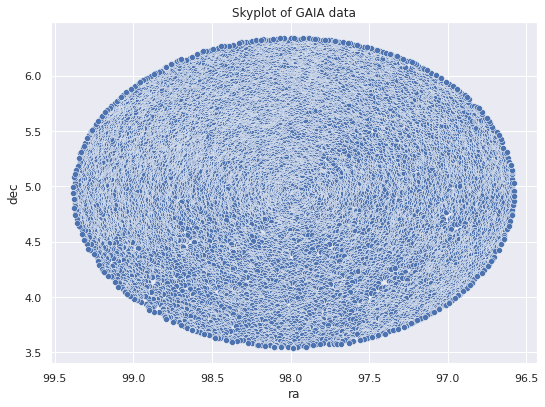

In [91]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [92]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [93]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [94]:
## saving only NGC 2244 data from Cantat GAIA DR2 paper

cantat_2244 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_2244")
cantat_2244 = cantat_2244[0].to_pandas()
cantat_2244

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,98.315200,4.536108,3130554284272036992,0.6074,-1.835,0.051,NaN,17.322500,2.3604,0.6,NGC_2244,98.315208,4.536108
1,98.457159,4.534730,3130556139698030848,0.6572,-1.377,0.032,NaN,15.034100,1.6524,0.9,NGC_2244,98.457165,4.534730
2,98.514262,4.569089,3130558166922576512,0.8257,-1.220,0.288,NaN,16.164101,2.0843,0.7,NGC_2244,98.514267,4.569088
3,98.506642,4.544843,3130556582078192256,0.6101,-1.558,-0.133,NaN,17.848499,2.5816,0.5,NGC_2244,98.506649,4.544844
4,98.248545,4.614187,3130555830460261632,0.2582,-0.307,1.344,NaN,16.274500,1.5222,0.1,NGC_2244,98.248546,4.614181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,97.838267,5.516140,3131975093817653760,0.8877,-1.589,0.239,NaN,14.896100,1.0744,0.5,NGC_2244,97.838274,5.516139
1697,97.711034,5.528785,3131977219820275200,0.8216,-0.366,-0.363,NaN,17.707899,1.8032,0.1,NGC_2244,97.711036,5.528787
1698,97.914338,5.590792,3131981381649718656,0.2708,-0.357,0.033,NaN,16.165501,1.6858,0.2,NGC_2244,97.914339,5.590792
1699,97.787003,5.521287,3131975467473614848,0.4338,-0.547,-0.545,NaN,17.078899,1.5405,0.2,NGC_2244,97.787005,5.521289


In [95]:
# renaming the cantat table to match it with gaia_data
cantat_2244 = cantat_2244.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [96]:
# taking the subset of only source_id and PMemb
cantat_2244 = cantat_2244.loc[:,['source_id', 'PMemb']]


In [97]:
# join the two table on source_id
cantat_2244 = all_stars_filtered.join(cantat_2244.set_index('source_id'), on='source_id')

In [98]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_2244 = cantat_2244.dropna(subset=['PMemb'])
cantat_2244

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
2,1635721458409799680,Gaia DR2 3131335693444047232,3131335693444047232,570736313,2015.5,97.981326,0.055816,4.942859,0.056805,0.626348,0.078796,7.948964,-2.129393,0.097138,-0.607344,0.085807,-0.473201,0.485140,0.101366,0.269323,-0.510178,-0.137630,-0.362503,0.521605,0.260175,-0.165336,113,113,112,1,9.321734,308.146759,0.000000,0.000000e+00,31,False,166.407257,1.705829,0.014366,-0.287584,...,6.575248,1.162213,0,0.204962,0.077064,0.127899,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.305806,-2.069510,98.376277,-18.264650,100001,8515.000000,8277.333008,8597.000000,0.5730,0.3370,0.7991,0.295,0.1819,0.3931,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002457,21.921320,7.078063,0.3
3,1635721458409799680,Gaia DR2 3131335689146178304,3131335689146178304,1314318181,2015.5,97.980179,0.073496,4.939380,0.054880,0.700612,0.110824,6.321826,-1.785018,0.112591,0.374499,0.087261,-0.454367,0.758523,0.488169,0.433483,-0.544240,-0.286180,-0.393630,0.705005,0.459420,0.153969,104,104,104,0,1.758212,125.077599,0.000000,0.000000e+00,31,True,414.085266,1.686908,0.013566,-0.156779,...,11.434020,1.203961,0,0.406557,0.126457,0.280100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.308368,-2.072129,98.375289,-18.268190,100001,7718.000000,7304.000000,7951.500000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.147669,2.965517,3.514609,31.673189,25.718752,37.627625,https://gea.esac.esa.int/data-server/datalink/...,,0.002491,15.854069,4.291714,0.8
27,1635721458409799680,Gaia DR2 3131335624724578304,3131335624724578304,1471090411,2015.5,97.982011,0.127735,4.933754,0.145052,0.658592,0.204422,3.221735,-0.747183,0.236201,0.897328,0.207289,-0.451528,0.461507,0.175121,0.246955,-0.674941,-0.267764,-0.279481,0.508619,0.319599,-0.150577,114,0,114,0,1.192974,126.840881,0.282572,9.498290e-01,31,False,1.625871,1.367265,0.029402,-0.192196,...,16.226515,1.530881,0,2.076817,0.933876,1.142941,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.314205,-2.073104,98.377552,-18.273700,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008397,3.163332,4.328866,0.1
42,1635721458409799680,Gaia DR2 3131336071401161600,3131336071401161600,1581351420,2015.5,97.989641,0.097861,4.944849,0.091782,0.601583,0.120634,4.986843,-2.195980,0.170624,0.628926,0.126389,0.065850,0.367930,0.598125,0.561073,-0.626636,0.230005,0.115203,0.303251,0.206499,0.343425,87,0,87,0,8.648282,248.697250,0.313457,1.020992e+01,31,False,7.934680,1.433488,0.016636,-0.048642,...,13.396297,1.340464,0,1.802761,0.865438,0.937324,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.307861,-2.061243,98.384863,-18.262182,100001,3965.333252,3900.000000,4149.500000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esa

In [99]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_2244.to_csv('NGC_2244_cantat.csv')
# all_stars.to_csv('NGC_2244_Gaia_30m.csv')

In [100]:
cantat_2244.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,6.300000e+02,6.300000e+02,6.300000e+02,630.0,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.0,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,6.270000e+02,627.000000,627.000000,627.000000,627.000000,630.000000,627.000000,627.000000,627.000000,11.000000,11.000000,630.000000,11.000000,11.000000,11.0,630.000000,630.000000,630.000000,630.000000,516.000000,516.000000,516.000000,516.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,630.000000,630.000000,630.000000,630.000000
mean,1.635721e+18,3.131463e+18,8.438025e+08,2015.5,98.090249,0.062272,5.026900,0.063986,0.580098,0.075081,9.936621,-1.462976,0.121523,0.239150,0.112558,-0.234306,0.128515,-0.146633,0.229684,-0.384556,0.086866,-0.311445,0.251367,0.124952,-0.173835,133.328571,11.571429,132.642857,0.685714,1.035669,157.828232,0.071219,1.121048,31.0,39.909985,1.499773,0.015915,-0.095847,15.226984,10.176190,...,1.013102e+05,376.553746,374.639191,14.633450,1.335080,0.047619,1.390237,0.600303,0.789934,60.112072,2.960796,0.082540,4909.090820,3.227273,0.0,206.281201,-1.934426,98.485137,-18.174153,100090.189922,4949.337402,4746.001953,5239.609375,1.507582,1.200173,1.804319,0.751445,0.594146,0.905092,200111.0,3.142941,2.807108,3.397831,15.488976,13.417843,17.560123,0.383729,14.912905,8.806538,0.412857
std,0.000000e+00,3.430999e+14,5.031549e+08,0.0,0.262634,0.031485,0.302806,0.033367,0.157766,0.039850,5.892396,0.632677,0.062236,0.899440,0.058737,0.166118,0.200035,0.222690,0.180102,0.185288,0.217400,0.189808,0.143891,0.141530,0.164544,16.687676,35.521871,16.589625,1.123369,4.093843,137.043625,0.135765,4.851497,0.0,78.181488,0.091091,0.008142,0.087298,1.876362,0.824354,...,8.883099e+05,3427.738000,249.269669,1.598869,0.106311,0.227559,0.479222,0.263769,0.230087,30.369849,5.089845,0.649945,490.824921,0.467099,0.0,0.293368,0.272347,0.275280,0.302867,413.122900,1000.406189,972.766174,1015.872681,0.641091,0.642166,0.677460,0.326117,0.321898,0.353124,0.0,3.787012,3.351630,4.074577,87.465683,77.945152,97.005302,0.179457,9.698563,5.605351,0.237789
min,1.635721e+18,3.130523e+18,6.321380e+05,2015.5,97.369488,0.021028,4.306968,0.021057,0.252601,0.022887,3.021758,-3.448733,0.040685,-1.780996,0.036940,-0.941033,-0.558181,-0.855564,-0.914970,-0.829997,-0.943199,-0.881575,-0.415105,-0.573430,-0.975644,77.000000,0.000000,77.000000,0.0000

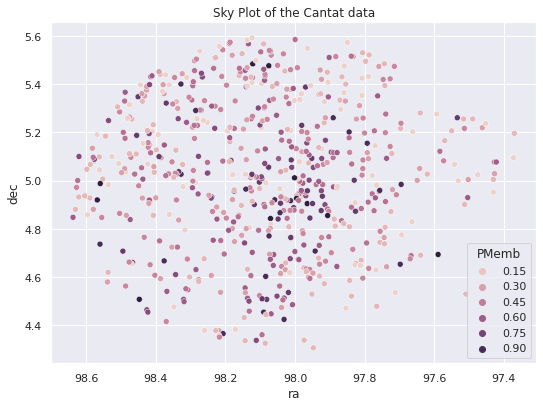

In [101]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_2244['ra'], y = cantat_2244['dec'], 
                          hue = cantat_2244['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [102]:
# import member dataset
member = cantat_2244.copy()

In [103]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_2244_center'] = distance

In [104]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_2244_center)
cantat_radius

0.6655363935872786

In [105]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_2244_center,member
2,1635721458409799680,Gaia DR2 3131335693444047232,3131335693444047232,570736313,2015.5,97.981326,0.055816,4.942859,0.056805,0.626348,0.078796,7.948964,-2.129393,0.097138,-0.607344,0.085807,-0.473201,0.485140,0.101366,0.269323,-0.510178,-0.137630,-0.362503,0.521605,0.260175,-0.165336,113,113,112,1,9.321734,308.146759,0.000000,0.000000,31,False,166.407257,1.705829,0.014366,-0.287584,...,0,0.204962,0.077064,0.127899,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.305806,-2.069510,98.376277,-18.264650,100001,8515.000000,8277.333008,8597.000000,0.573,0.337,0.7991,0.295,0.1819,0.3931,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002457,21.921320,7.078063,0.3,0.002460,1
3,1635721458409799680,Gaia DR2 3131335689146178304,3131335689146178304,1314318181,2015.5,97.980179,0.073496,4.939380,0.054880,0.700612,0.110824,6.321826,-1.785018,0.112591,0.374499,0.087261,-0.454367,0.758523,0.488169,0.433483,-0.544240,-0.286180,-0.393630,0.705005,0.459420,0.153969,104,104,104,0,1.758212,125.077599,0.000000,0.000000,31,True,414.085266,1.686908,0.013566,-0.156779,...,0,0.406557,0.126457,0.280100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.308368,-2.072129,98.375289,-18.268190,100001,7718.000000,7304.000000,7951.500000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.147669,2.965517,3.514609,31.673189,25.718752,37.627625,https://gea.esac.esa.int/data-server/datalink/...,,0.002491,15.854069,4.291714,0.8,0.002499,1
27,1635721458409799680,Gaia DR2 3131335624724578304,3131335624724578304,1471090411,2015.5,97.982011,0.127735,4.933754,0.145052,0.658592,0.204422,3.221735,-0.747183,0.236201,0.897328,0.207289,-0.451528,0.461507,0.175121,0.246955,-0.674941,-0.267764,-0.279481,0.508619,0.319599,-0.150577,114,0,114,0,1.192974,126.840881,0.282572,0.949829,31,False,1.625871,1.367265,0.029402,-0.192196,...,0,2.076817,0.933876,1.142941,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.314205,-2.073104,98.377552,-18.273700,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008397,3.163332,4.328866,0.1,0.008404,1
42,1635721458409799680,Gaia DR2 3131336071401161600,3131336071401161600,1581351420,2015.5,97.989641,0.097861,4.944849,0.091782,0.601583,0.120634,4.986843,-2.195980,0.170624,0.628926,0.126389,0.065850,0.367930,0.598125,0.561073,-0.626636,0.230005,0.115203,0.303251,0.206499,0.343425,87,0,87,0,8.648282,248.697250,0.313457,10.209917,31,False,7.934680,1.433488,0.016636,-0.048642,...,0,1.802761,0.865438,0.937324,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.307861,-2.061243,98.384863,-18.262182,100001,3965.333252,3900.000000,4149.500000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.010905,12.870258,4.976129,0.6,0.010909,

In [106]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_2244_center'] = distance

In [107]:
non_member = all_stars_filtered[all_stars_filtered['dist_2244_center'] >= 1.35].sample(len(member), random_state = 42)

In [108]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_2244_center,member
193295,1635721458409799680,Gaia DR2 3132126341086352256,3132126341086352256,1352967419,2015.5,98.491892,0.093891,6.243217,0.094884,0.579706,0.114281,5.072656,-4.684936,0.171755,3.434090,0.150497,-0.245546,0.145634,-0.186220,0.429527,-0.428383,0.219827,-0.356514,0.324611,0.148385,-0.156281,114,0,112,2,1.059587,122.529793,0.204688,0.920777,31,False,3.110214,1.502059,0.028528,-0.071916,...,1.249176,0,1.276129,0.570770,0.705359,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,205.385711,-1.019185,98.826859,-16.936242,100001,5019.500000,4824.189941,5074.000000,0.842,0.5920,1.1168,0.4110,0.2824,0.566,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,1.398006,27.276863,22.818401,1.397788,0
183093,1635721458409799680,Gaia DR2 3130906368513381120,3130906368513381120,908812055,2015.5,99.346598,0.036682,4.846898,0.037262,0.576934,0.047736,12.085907,-1.332871,0.069276,-3.352513,0.061213,-0.173407,0.225462,-0.085905,0.210317,-0.456180,-0.031274,-0.404015,0.389588,0.261406,-0.077456,142,0,142,0,-3.943062,81.076355,0.000000,0.000000,31,False,18.060877,1.582198,0.010496,-0.034242,...,1.238503,0,1.042416,0.433279,0.609137,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,207.017054,-0.905858,99.812305,-18.274584,100001,5181.676270,4900.167480,5767.656738,1.275,0.7879,1.6305,0.6480,0.3909,0.817,200111,1.729531,1.395951,1.933958,1.942820,1.587116,2.298524,https://gea.esac.esa.int/data-server/datalink/...,,1.365730,19.240093,54.768020,1.365833,0
193262,1635721458409799680,Gaia DR2 3131083011930019840,3131083011930019840,108694486,2015.5,99.279800,0.043383,5.467449,0.042390,0.509539,0.050790,10.032237,-1.320295,0.078215,-5.375880,0.069285,-0.329450,0.259309,-0.156292,0.358362,-0.245279,0.216925,-0.441071,0.380776,0.099392,-0.191646,142,0,141,1,-0.478270,127.623611,0.000000,0.000000,31,False,12.767500,1.542940,0.012144,-0.130094,...,1.244908,0,1.133164,0.483286,0.649879,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,206.435174,-0.680046,99.698378,-17.659958,100001,4969.000000,4866.310059,5155.203125,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.834462,1.704336,1.912701,1.848366,1.444436,2.252297,https://gea.esac.esa.int/data-server/datalink/...,,1.397909,16.880429,77.590873,1.397403,0
186226,1635721458409799680,Gaia DR2 3132122973833440000,3132122973833440000,976338073,2015.5,98.543343,0.395121,6.197611,0.408430,1.866639,0.459332,4.063815,-4.457840,0.699152,-14.008614,0.695848,-0.419958,0.342635,-0.329611,0.144588,-0.489369,0.008913,-0.366837,0.224849,0.072848,-0.177655,126,0,126,0,0.576778,129.497391,0.000000,0.000000,31,False,0.158463,1.189631,0.109026,-0.294240,...,1.411316,0,2.510365,1.380756,1.129608,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,205.449761,-0.994797,98.883167,-16.978610,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


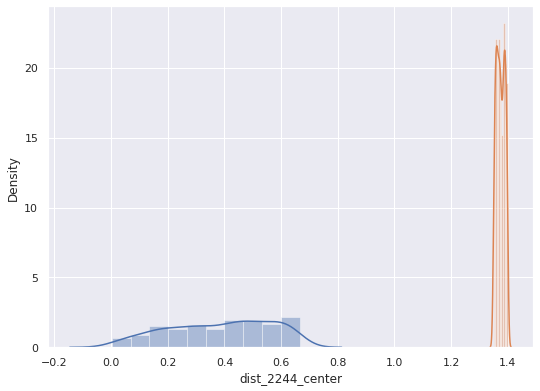

In [109]:
sns.distplot(member['dist_2244_center'])
sns.distplot(non_member['dist_2244_center'])
plt.show()

In [110]:
training_data = pd.concat([member, non_member])

In [111]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_2244_center,member
count,1.260000e+03,1.260000e+03,1.260000e+03,1260.0,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.0,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,...,1251.000000,1251.000000,1251.000000,1260.000000,1251.000000,1251.000000,1251.000000,33.000000,33.000000,1260.000000,33.000000,33.000000,33.000000,1260.000000,1260.000000,1260.000000,1260.000000,935.000000,935.000000,935.000000,935.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,653.0,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,1260.000000,1260.000000,1260.000000,630.000000,1260.000000,1260.000000
mean,1.635721e+18,3.131430e+18,8.330568e+08,2015.5,97.999787,0.081919,5.072321,0.084646,0.848534,0.098794,11.949682,-0.586127,0.160566,-1.907245,0.150137,-0.209229,0.103722,-0.158259,0.239540,-0.384085,0.107272,-0.318552,0.229796,0.129904,-0.162215,133.952381,9.859524,133.210317,0.742063,1.082947,180.355759,0.113804,3.120454,31.0,35.198666,1.483798,0.021308,-0.086136,15.307143,10.176984,...,345.199890,14.990911,1.329118,0.062698,1.473623,0.666209,0.807414,42.280410,2.857699,0.114286,5204.545410,3.318182,-0.053030,206.198995,-1.993234,98.387281,-18.132546,100056.673797,4920.157227,4730.451172,5203.402832,1.207124,0.936236,1.493034,0.600481,0.464570,0.746375,200111.0,2.684677,2.413317,2.889167,10.807282,9.364993,12.249590,0.879396,21.398732,27.582148,0.412857,0.879358,0.500000
std,0.000000e+00,5.044143e+14,4.943664e+08,0.0,0.709213,0.078651,0.720655,0.083456,0.901866,0.097386,12.531012,5.621891,0.155865,6.280997,0.155826,0.174601,0.181203,0.193923,0.170848,0.176835,0.199561,0.168682,0.143990,0.131556,0.167247,16.222861,33.910410,16.121443,1.232719,5.378757,663.307678,0.282875,62.932477,0.0,77.438332,0.102367,0.021039,0.087847,1.816467,0.804837,...,249.168900,1.705075,0.116006,0.264450,0.525963,0.308096,0.234217,33.464070,3.818563,0.732510,727.405945,0.622723,0.263373,0.689675,0.737148,0.739500,0.724386,329.007910,909.280396,892.420593,921.395081,0.715264,0.669055,0.774580,0.360419,0.333520,0.395808,0.0,3.443630,3.077921,3.688136,66.342491,59.076939,73.625351,0.511933,34.260249,58.640081,0.237789,0.511904,0.500199
min,1.635721e+18,3.130239e+18,5.619770e+05,2015.5,96.583214,0.018310,3.544167,0.018159,0.106692,0.020887,3.001037,-38.735932,0.035661,-97.931824,0.032989,-0.941033,-0.558181,-0.870611,-0.914970,-0.901631,-0.943199,-0.895527,-0.469431,-0.573430,-0.

In [112]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [113]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,1260.000000,1260.000000,1260.000000
mean,0.848534,-0.586126,-1.907244
std,0.901867,5.621891,6.280997
min,0.106692,-38.735931,-97.931824
25%,0.483347,-1.877039,-2.754570
50%,0.642549,-1.153516,-0.579905
75%,0.849749,0.319671,0.772152
max,16.584772,108.859879,25.885239


In [114]:
targets.value_counts()

1    630
0    630
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


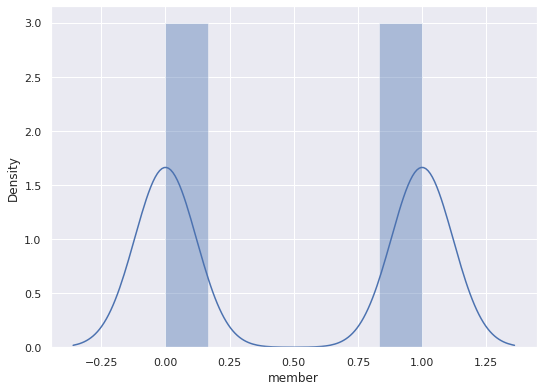

In [115]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

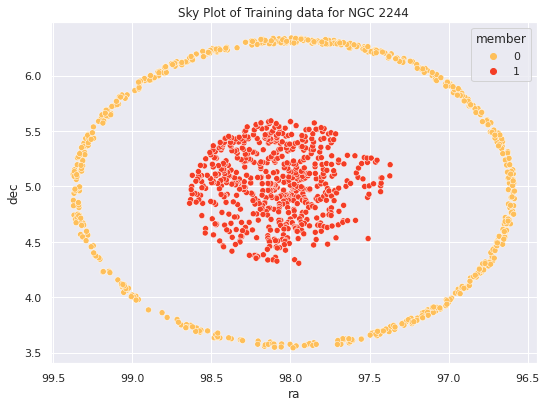

In [116]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 2244')
plt.show()

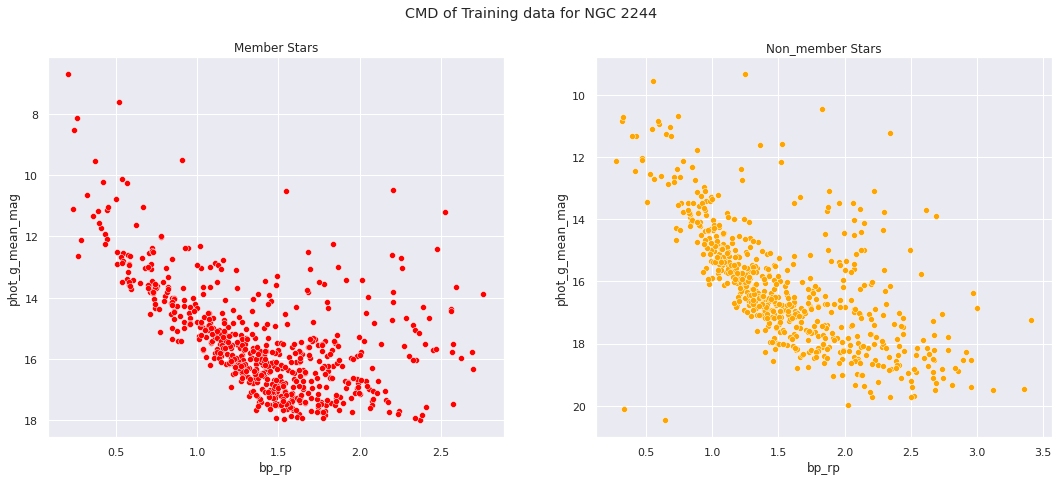

In [117]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 2244 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


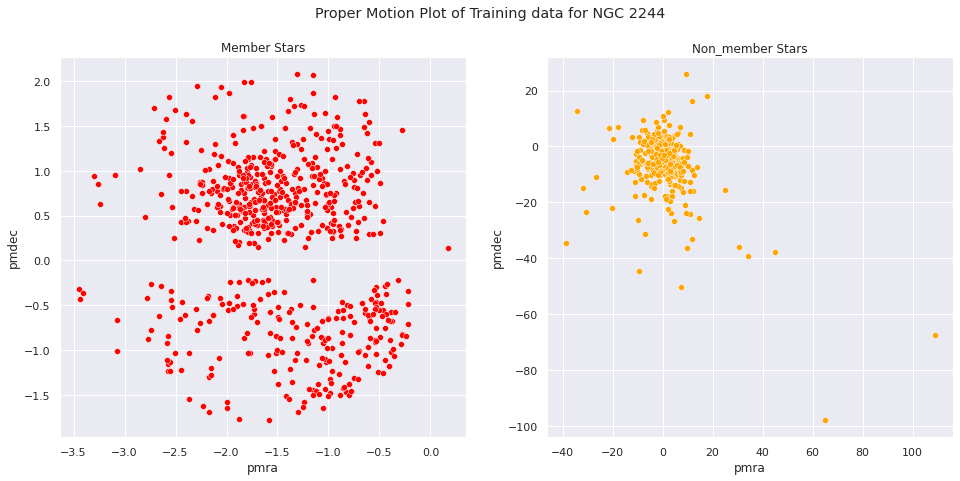

In [118]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 2244 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


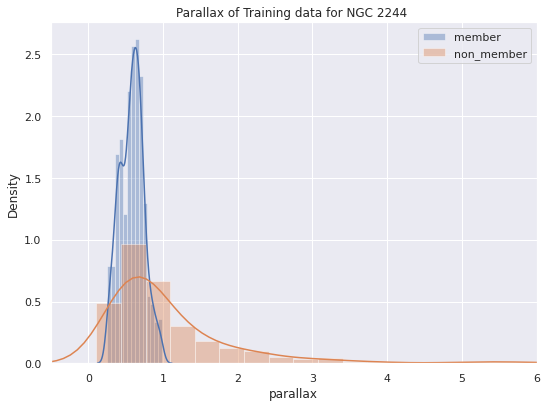

In [119]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 2244 ')
plt.legend()
plt.show()

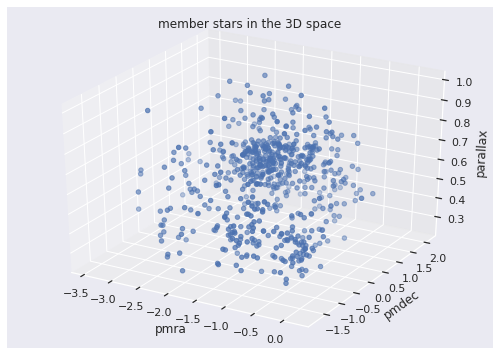

In [120]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


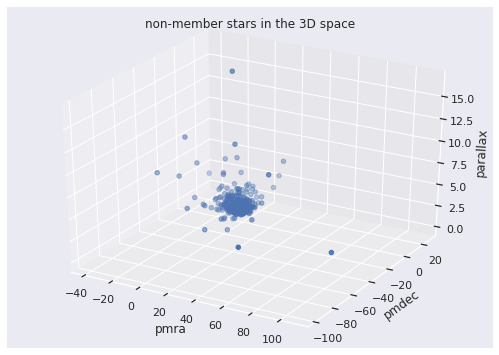

In [121]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [122]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec       0.396521
pmra        0.369997
parallax    0.233482
dtype: float64

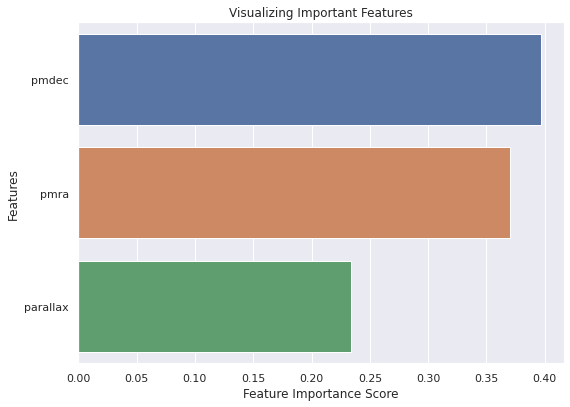

In [124]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [126]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [127]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [128]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [129]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [130]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [131]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 800}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.895
Accuracy on test data: 0.926


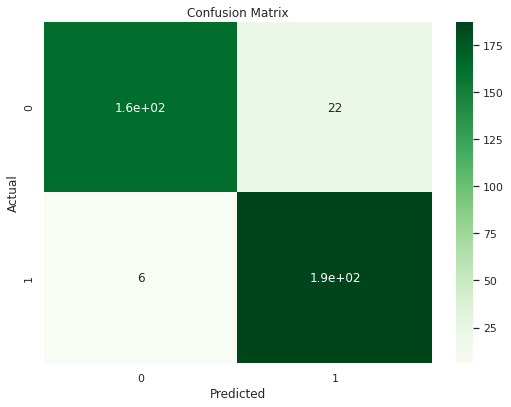

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       185
           1       0.89      0.97      0.93       193

    accuracy                           0.93       378
   macro avg       0.93      0.92      0.93       378
weighted avg       0.93      0.93      0.93       378



In [132]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.928
Precision on testing data: 0.896
Accuracy on test data: 0.931


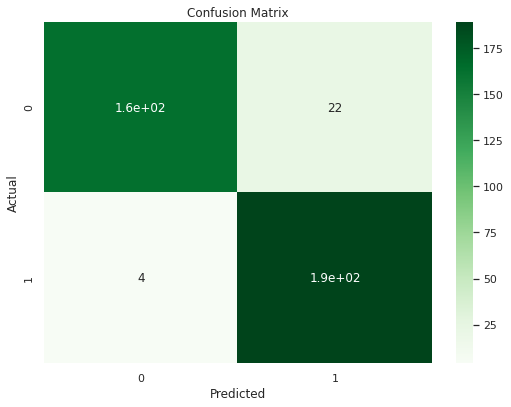

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       185
           1       0.90      0.98      0.94       193

    accuracy                           0.93       378
   macro avg       0.94      0.93      0.93       378
weighted avg       0.94      0.93      0.93       378



In [133]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [134]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_2244_center
count,2.698800e+04,2.698800e+04,2.698800e+04,26988.0,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.0,26988.000000,26987.000000,26987.000000,26988.000000,26988.000000,26988.000000,...,2.675500e+04,2.675500e+04,26755.000000,26755.000000,26754.000000,26988.000000,26754.000000,26756.000000,26755.000000,917.000000,917.000000,26988.000000,917.000000,917.000000,917.000000,26988.000000,26988.000000,26988.000000,26988.000000,17579.000000,17579.000000,17579.000000,17579.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,13241.0,13241.000000,13241.000000,13241.000000,13241.000000,13241.000000,13241.000000,26988.000000,26988.000000,26988.000000,26988.000000
mean,1.635721e+18,3.131406e+18,8.491404e+08,2015.5,98.000361,0.100735,5.061062,0.103589,1.141625,0.121474,15.113580,0.270211,0.200111,-4.114331,0.189323,-0.200053,0.095374,-0.154941,0.221399,-0.393233,0.097458,-0.306128,0.210593,0.148605,-0.174560,133.677597,7.581888,132.962576,0.715021,1.289761,205.909500,0.163613,3.174683,31.0,28.625387,1.466173,0.026217,-0.084292,15.259930,10.195346,...,5.674617e+04,2.617172e+02,331.884888,15.311706,1.348130,0.060545,1.559839,0.714173,0.845654,29.379963,2.344717,0.155365,5393.184082,3.511996,-0.085605,206.209250,-1.997911,98.388648,-18.143749,100043.271631,4853.520996,4678.747559,5124.357910,0.880783,0.665494,1.128510,0.437724,0.328852,0.562654,200111.0,2.123812,1.906897,2.287136,5.716237,4.985670,6.446826,0.941120,28.756398,47.949697,0.941084
std,0.000000e+00,5.245691e+14,4.910159e+08,0.0,0.708792,0.100343,0.695657,0.103751,1.131072,0.122044,19.545198,7.624975,0.203869,9.855478,0.204922,0.176266,0.176032,0.193806,0.177450,0.172383,0.190476,0.173325,0.151303,0.132607,0.180181,16.604671,30.290283,16.553028,1.169726,6.250453,2487.988281,0.347323,73.863104,0.0,69.075882,0.105940,0.026558,0.082558,1.856624,0.814879,...,1.125997e+06,1.103550e+04,273.979065,1.711650,0.177370,0.267499,0.530968,0.321083,0.244028,31.248749,2.956096,0.894923,688.125732,0.626359,0.338215,0.676019,0.725276,0.739998,0.698666,287.497468,769.610962,760.743042,784.862305,0.711085,0.665159,0.761484,0.356808,0.331332,0.385998,0.0,3.421728,3.054942,3.738998,40.355843,36.800179,43.982883,0.333911,61.232515,91.716484,0.333891
min,1.635721e+18,3.130239e+18,1.594900e+04,2015.5,96.574769,0.018101,3.542293,0.017791,0.106692,0.020042,3.00

In [135]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_2244_center'] <= cantat_radius*2]

In [136]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [137]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [138]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [139]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    21365
1     2113
Name: member, dtype: int64

In [140]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

2113

In [141]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

2113

In [142]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_2244_center,member,PMemb
count,2.113000e+03,2.113000e+03,2.113000e+03,2113.0,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.0,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2107.000000,2107.000000,2107.000000,2113.000000,2107.000000,2107.000000,2107.000000,46.000000,46.000000,2113.000000,46.000000,46.000000,46.000000,2113.000000,2113.000000,2113.000000,2113.000000,1687.000000,1687.000000,1687.000000,1687.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,1023.0,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.0,2113.000000
mean,1.635721e+18,3.131485e+18,8.363597e+08,2015.5,98.199534,0.065416,5.208343,0.066814,0.546957,0.079025,9.000313,-1.399176,0.129556,0.059903,0.120835,-0.187903,0.103036,-0.147050,0.210212,-0.402638,0.088303,-0.302532,0.201791,0.162575,-0.168648,134.118315,6.240890,133.451964,0.666351,0.729283,152.814133,0.075457,1.157787,31.0,28.406267,1.490772,0.017005,-0.078224,15.305253,10.285850,...,357.723511,14.966178,1.304199,0.056791,1.453618,0.667170,0.786444,46.249491,2.080607,0.090866,5032.608887,3.217391,-0.081522,206.169950,-1.754009,98.587679,-17.984974,100020.028453,4831.512207,4649.899414,5120.353516,1.529660,1.252661,1.822772,0.764569,0.621793,0.915559,200111.0,3.181865,2.819223,3.438905,9.675702,8.107229,11.244176,1.007555,13.579204,10.178270,1.007482,1.0,0.832762
std,0.000000e+00,5.117286e+14,4.869446e+08,0.0,0.721247,0.036684,0.659033,0.037514,0.170790,0.044177,5.806468,0.690383,0.073314,1.079212,0.069539,0.167594,0.168810,0.172292,0.162585,0.158976,0.168898,0.153063,0.144547,0.119753,0.171276,16.159750,27.677016,16.103791,1.086631,3.884606,158.727127,0.143585,6.918966,0.0,63.088676,0.087875,0.009742,0.076246,1.794102,0.766037,...,240.484146,1.411547,0.083589,0.241508,0.485006,0.287796,0.204848,28.385696,2.734662,0.657328,554.297974,0.583592,0.312047,0.640244,0.735446,0.751402,0.663408,193.900570,853.001953,827.219543,875.283691,0.689963,0.696510,0.715191,0.350205,0.351125,0.368515,0.0,3.824922,3.387514,4.145417,32.468002,28.146523,36.847542,0.232914,9.744437,6.603623,0.232894,0.0,0.135426
min,1.635721e+18,3.130334e+18,1.275950e+05,2015.5,96.649895,0.020952,3.638006,0.019374,0.244813,0.023252,3.006515,-3.325124,0.039418,-1.767672,0.035787,-0.930985,-0.624156,-0.864669,-0.915028,-0.888028,-0.937111,-0.868525,-0.551404,-0.546003,-0.966786,76.00

In [143]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_2244_center,member
count,6.300000e+02,6.300000e+02,6.300000e+02,630.0,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.0,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,627.000000,627.000000,627.000000,630.000000,627.000000,627.000000,627.000000,11.000000,11.000000,630.000000,11.000000,11.000000,11.0,630.000000,630.000000,630.000000,630.000000,516.000000,516.000000,516.000000,516.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.0
mean,1.635721e+18,3.131463e+18,8.438025e+08,2015.5,98.090249,0.062272,5.026900,0.063986,0.580098,0.075081,9.936621,-1.462976,0.121523,0.239150,0.112558,-0.234306,0.128515,-0.146633,0.229684,-0.384556,0.086866,-0.311445,0.251367,0.124952,-0.173835,133.328571,11.571429,132.642857,0.685714,1.035669,157.828232,0.071219,1.121048,31.0,39.909985,1.499773,0.015915,-0.095847,15.226984,10.176190,...,374.639191,14.633450,1.335080,0.047619,1.390237,0.600303,0.789934,60.112072,2.960796,0.082540,4909.090820,3.227273,0.0,206.281201,-1.934426,98.485137,-18.174153,100090.189922,4949.337402,4746.001953,5239.609375,1.507582,1.200173,1.804319,0.751445,0.594146,0.905092,200111.0,3.142941,2.807108,3.397831,15.488976,13.417843,17.560123,0.383729,14.912905,8.806538,0.412857,0.383718,1.0
std,0.000000e+00,3.430999e+14,5.031549e+08,0.0,0.262634,0.031485,0.302806,0.033367,0.157766,0.039850,5.892396,0.632677,0.062236,0.899440,0.058737,0.166118,0.200035,0.222690,0.180102,0.185288,0.217400,0.189808,0.143891,0.141530,0.164544,16.687676,35.521871,16.589625,1.123369,4.093843,137.043625,0.135765,4.851497,0.0,78.181488,0.091091,0.008142,0.087298,1.876362,0.824354,...,249.269669,1.598869,0.106311,0.227559,0.479222,0.263769,0.230087,30.369849,5.089845,0.649945,490.824921,0.467099,0.0,0.293368,0.272347,0.275280,0.302867,413.122900,1000.406189,972.766174,1015.872681,0.641091,0.642166,0.677460,0.326117,0.321898,0.353124,0.0,3.787012,3.351630,4.074577,87.465683,77.945152,97.005302,0.179457,9.698563,5.605351,0.237789,0.179446,0.0
min,1.635721e+18,3.130523e+18,6.321380e+05,2015.5,97.369488,0.021028,4.306968,0.021057,0.252601,0.022887,3.021758,-3.448733,0.040685,-1.780996,0.036940,-0.941033,-0.558181,-0.855564,-0.914970,-0.829997,-0.943199,-0.881575,-0.415105,-0.573430,-0.975644,77.000000,0.000000,77.000000,0.000000,-5.659819,54.058754,0.000000,0.000000,31.0,0.

#### Visualization

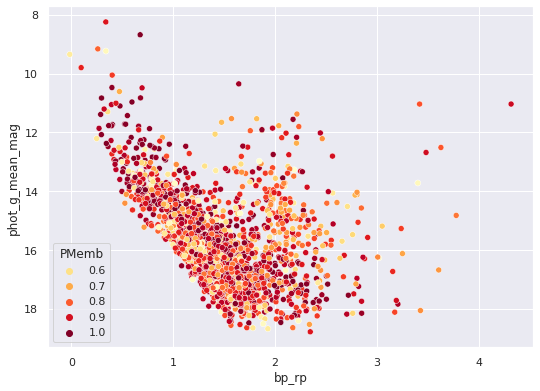

In [144]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

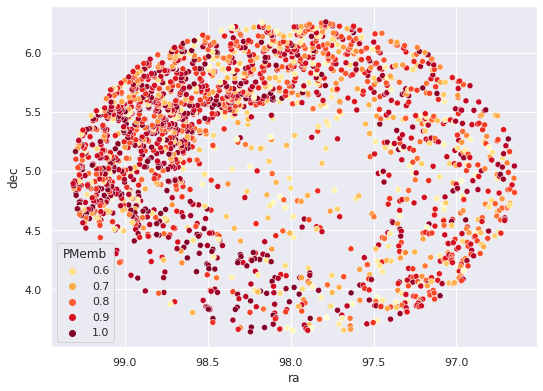

In [145]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

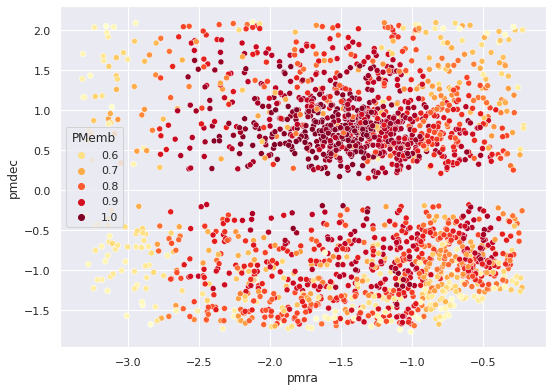

In [146]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


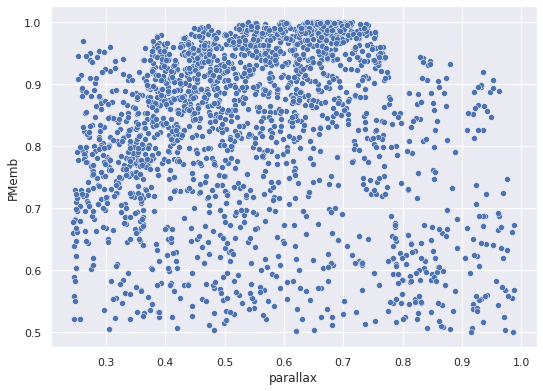

In [147]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [148]:
# saving the files as csv
# all_stars.to_csv('gaia_2244_membership_prob.csv')

potentialMember.to_csv('NGC_2244_membership_prob.csv')


### Comparing the old and new predicted members

In [149]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [150]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_2244_center,member,PMemb
count,2.743000e+03,2.743000e+03,2.743000e+03,2743.0,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.0,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,...,2734.000000,2734.000000,2734.000000,2743.000000,2734.000000,2734.000000,2734.000000,57.000000,57.000000,2743.000000,57.000000,57.000000,57.000000,2743.000000,2743.000000,2743.000000,2743.000000,2203.000000,2203.000000,2203.000000,2203.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,1387.0,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.0,2743.000000
mean,1.635721e+18,3.131480e+18,8.380691e+08,2015.5,98.174434,0.064694,5.166670,0.066165,0.554569,0.078119,9.215361,-1.413829,0.127711,0.101072,0.118934,-0.198561,0.108888,-0.146954,0.214685,-0.398484,0.087973,-0.304579,0.213178,0.153934,-0.169840,133.936930,7.465184,133.266132,0.670798,0.799652,153.965576,0.074484,1.149349,31.0,31.048450,1.492839,0.016755,-0.082272,15.287277,10.260664,...,361.602875,14.889889,1.311281,0.054685,1.439081,0.651835,0.787245,48.924726,2.250468,0.088954,5008.771973,3.219298,-0.065789,206.195502,-1.795446,98.564128,-18.028424,100036.462097,4859.106445,4672.409668,5148.291504,1.524621,1.240684,1.818562,0.761573,0.615484,0.913170,200111.0,3.171652,2.816044,3.428124,11.201320,9.500923,12.901715,0.864277,13.885523,9.863217,0.864219,1.0,0.736320
std,0.000000e+00,4.783186e+14,4.906324e+08,0.0,0.647004,0.035576,0.601161,0.036616,0.168438,0.043246,5.838541,0.677983,0.070992,1.043246,0.067292,0.168362,0.176758,0.185041,0.166938,0.165529,0.181148,0.162247,0.145869,0.126061,0.169738,16.282831,29.740504,16.217182,1.095001,3.935001,154.007751,0.141814,6.501734,0.0,67.016838,0.088688,0.009409,0.079253,1.813277,0.781026,...,242.585236,1.463035,0.090231,0.238367,0.484332,0.283815,0.210865,29.028270,3.279998,0.655531,540.677734,0.559157,0.281602,0.581089,0.662861,0.673889,0.605283,263.792743,890.879944,864.239746,911.323425,0.678823,0.684483,0.706418,0.344717,0.344689,0.364886,0.0,3.813686,3.376932,4.125516,52.796772,46.699234,58.935741,0.343583,9.748315,6.413199,0.343551,0.0,0.241462
min,1.635721e+18,3.130334e+18,1.275950e+05,2015.5,96.649895,0.020952,3.638006,0.019374,0.244813,0.022887,3.006515,-3.448733,0.039418,-1.780996,0.035787,-0.941033,-0.624156,-0.864669,-0.915028,-0.888028,-0.943199,-0.881575,-0.551404,-0.573430,-0.975644,76.00

In [151]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_2244_center,member
count,6.300000e+02,6.300000e+02,6.300000e+02,630.0,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.0,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,627.000000,627.000000,627.000000,630.000000,627.000000,627.000000,627.000000,11.000000,11.000000,630.000000,11.000000,11.000000,11.0,630.000000,630.000000,630.000000,630.000000,516.000000,516.000000,516.000000,516.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.0
mean,1.635721e+18,3.131463e+18,8.438025e+08,2015.5,98.090249,0.062272,5.026900,0.063986,0.580098,0.075081,9.936621,-1.462976,0.121523,0.239150,0.112558,-0.234306,0.128515,-0.146633,0.229684,-0.384556,0.086866,-0.311445,0.251367,0.124952,-0.173835,133.328571,11.571429,132.642857,0.685714,1.035669,157.828232,0.071219,1.121048,31.0,39.909985,1.499773,0.015915,-0.095847,15.226984,10.176190,...,374.639191,14.633450,1.335080,0.047619,1.390237,0.600303,0.789934,60.112072,2.960796,0.082540,4909.090820,3.227273,0.0,206.281201,-1.934426,98.485137,-18.174153,100090.189922,4949.337402,4746.001953,5239.609375,1.507582,1.200173,1.804319,0.751445,0.594146,0.905092,200111.0,3.142941,2.807108,3.397831,15.488976,13.417843,17.560123,0.383729,14.912905,8.806538,0.412857,0.383718,1.0
std,0.000000e+00,3.430999e+14,5.031549e+08,0.0,0.262634,0.031485,0.302806,0.033367,0.157766,0.039850,5.892396,0.632677,0.062236,0.899440,0.058737,0.166118,0.200035,0.222690,0.180102,0.185288,0.217400,0.189808,0.143891,0.141530,0.164544,16.687676,35.521871,16.589625,1.123369,4.093843,137.043625,0.135765,4.851497,0.0,78.181488,0.091091,0.008142,0.087298,1.876362,0.824354,...,249.269669,1.598869,0.106311,0.227559,0.479222,0.263769,0.230087,30.369849,5.089845,0.649945,490.824921,0.467099,0.0,0.293368,0.272347,0.275280,0.302867,413.122900,1000.406189,972.766174,1015.872681,0.641091,0.642166,0.677460,0.326117,0.321898,0.353124,0.0,3.787012,3.351630,4.074577,87.465683,77.945152,97.005302,0.179457,9.698563,5.605351,0.237789,0.179446,0.0
min,1.635721e+18,3.130523e+18,6.321380e+05,2015.5,97.369488,0.021028,4.306968,0.021057,0.252601,0.022887,3.021758,-3.448733,0.040685,-1.780996,0.036940,-0.941033,-0.558181,-0.855564,-0.914970,-0.829997,-0.943199,-0.881575,-0.415105,-0.573430,-0.975644,77.000000,0.000000,77.000000,0.000000,-5.659819,54.058754,0.000000,0.000000,31.0,0.

In [152]:
concatenated.dataset.value_counts()

New_member    2113
Old_member     630
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

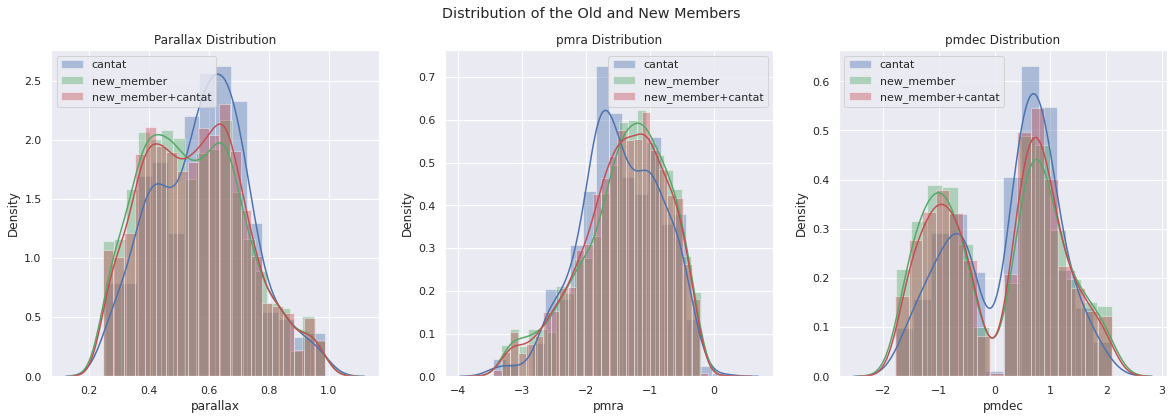

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


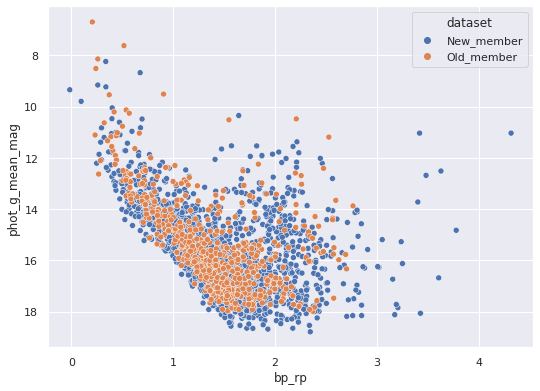

In [154]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

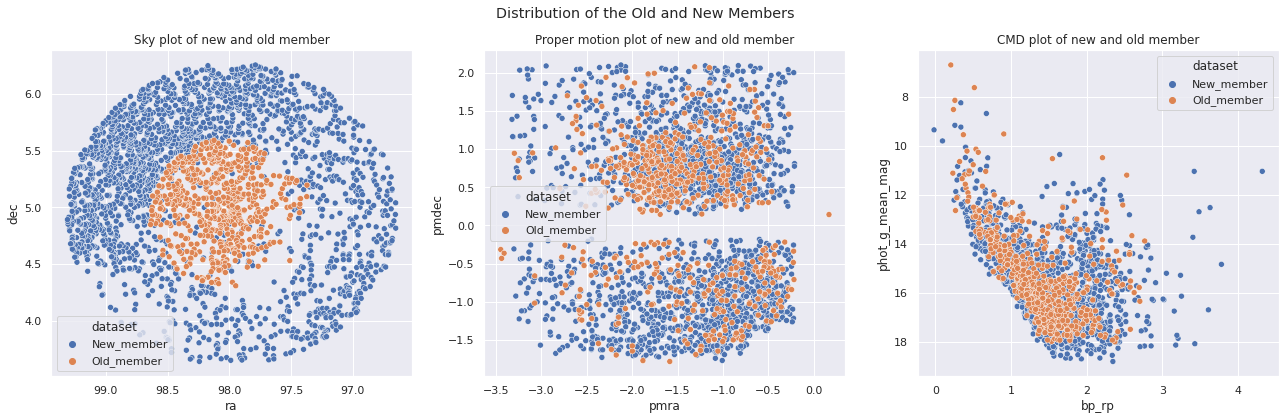

In [155]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
skyplot.invert_xaxis()
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD plot of new and old member')

plt.show()

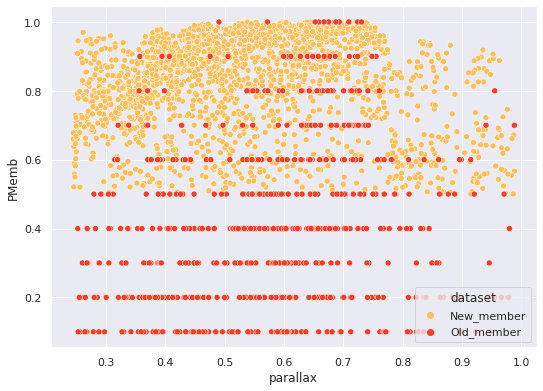

In [156]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [157]:
# pd_prof.ProfileReport(potentialMember)

In [158]:
#files.download('NGC_2244_cantat.csv')

#files.download('NGC_2244_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


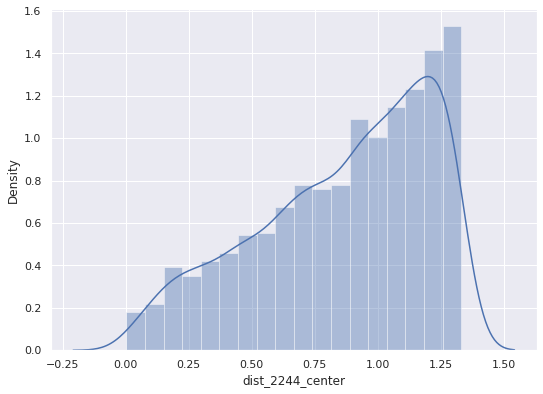

In [159]:
sns.distplot(concatenated['dist_2244_center'])

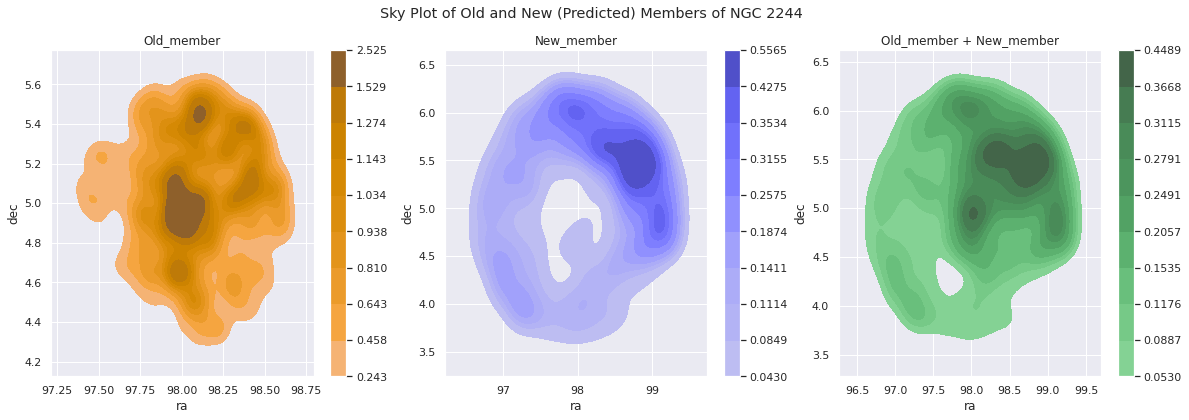

In [160]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 2244')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

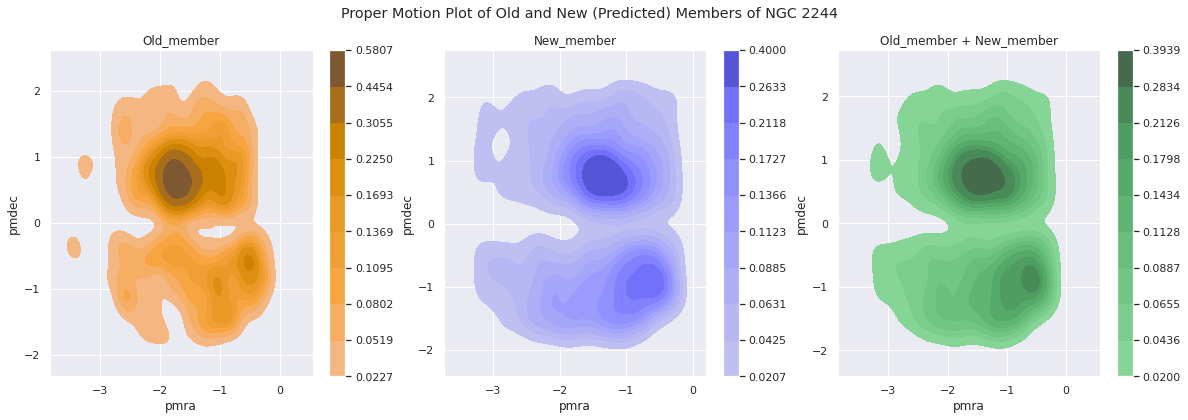

In [161]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 2244')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [162]:
#files.download('NGC_2244_cantat.csv')

potentialMember.to_csv('NGC_2244_additional_member_prob.csv')
concatenated.to_csv('NGC_2244_all_member_prob.csv')

files.download('NGC_2244_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_2244_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>